Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2611 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0793 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9815
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9754
Test accuracy: 97.54%
313/313 [==============================] - 0s 1ms/step


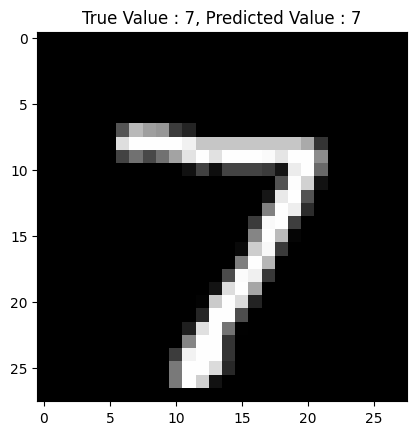

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),                  # Flatten 28x28 images to 1D vector
    layers.Dense(128, activation='relu'),                  # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')                 # Output layer for 10 classes
])

# TensorBoard callback to log training metrics
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='../../logs/adam')  # TensorBoard logs will be saved in this directory

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with TensorBoard callback
model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Predict on test data
predictions = model.predict(x_test)

# Visualize one prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()
